In [599]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [600]:
def reconstruct(img,marker):
    mask = img 
    se = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    recon1 = marker 
    recon_old = np.zeros(recon1.shape,np.int8)
    while np.sum(np.sum(recon1- recon_old)) != 0:
        recon_old = recon1
        recon1 = cv.dilate(recon1 , se)
        recon1 = recon1 & mask
    return recon1 

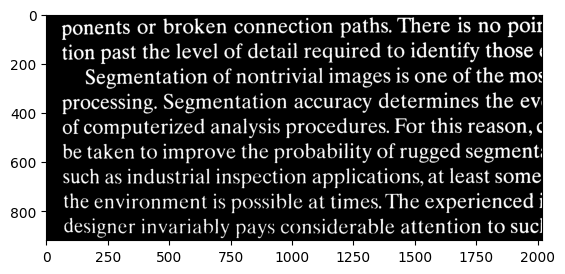

In [601]:
img = cv.imread("letter.png",0)

plt.imshow(img,cmap = "gray")

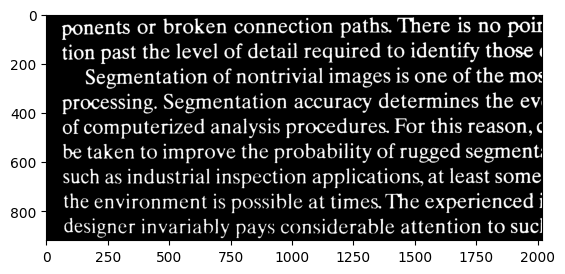

In [602]:
kernel = cv.getStructuringElement(cv.MORPH_RECT, (7,1))
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap = "gray")

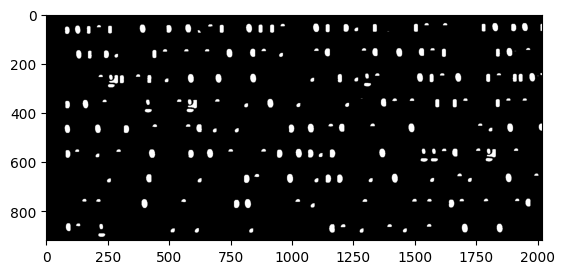

In [603]:
im_flood_fill = closing.copy()
h, w = closing.shape[:2]
mask = np.zeros((h + 2, w + 2), np.uint8)
cv.floodFill(im_flood_fill, mask, (0, 0), 255)
im_flood_fill_inv = cv.bitwise_not(im_flood_fill)
plt.imshow(im_flood_fill_inv,cmap = "gray")


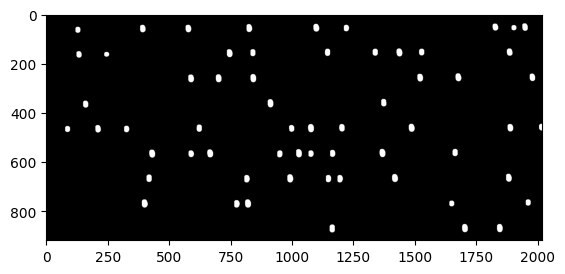

In [604]:
se = cv.getStructuringElement(cv.MORPH_ELLIPSE,(20,20))
img_opening = cv.morphologyEx(im_flood_fill_inv,cv.MORPH_OPEN,se)
plt.imshow(img_opening,cmap = "gray")

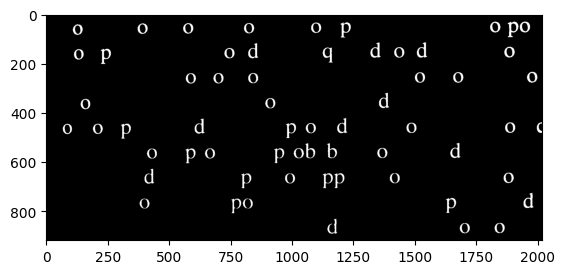

In [607]:
output = reconstruct(img,img_opening)
plt.imshow(output,cmap = "gray")

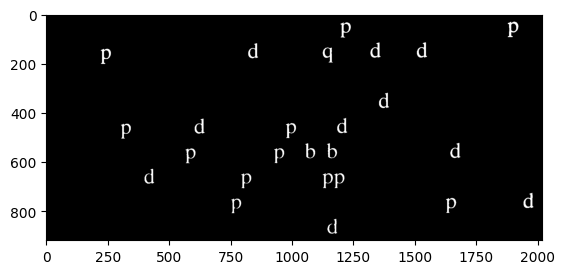

In [614]:
se = cv.getStructuringElement(cv.MORPH_RECT,(1,51))
long_letter = cv.erode(output,se)
long_letter = reconstruct(output,long_letter)
plt.imshow(long_letter,cmap = "gray")

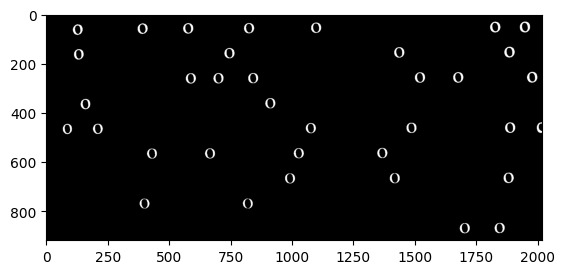

In [616]:
result = output - long_letter
plt.imshow(result,cmap = "gray")

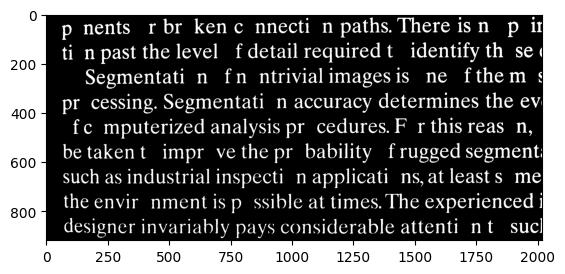

In [610]:
img -= result
plt.imshow(img,cmap = "gray")